## Задача №3.
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

### Доп.требование: для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split



In [3]:
# 1. Загрузка данных
df = pd.read_csv("googleplaystore.csv")  # Укажите правильный путь к вашему файлу



In [4]:
# Вывод первых строк чтобы проверить структуру данных
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# 2. Предобработка (частичная, для примера)
# Удаляем строки с пропущенными значениями (проще для примера, но в реальных задачах лучше заполнять)
df.dropna(inplace=True)

# Удаляем дубликаты
df.drop_duplicates(subset=['App'], inplace=True)

# Очистка данных в столбце Installs
def clean_installs(installs):
    installs = installs.replace('+', '').replace(',', '')
    return int(installs)

df['Installs'] = df['Installs'].apply(clean_installs)

### 3. Violin Plot (для 'Rating')

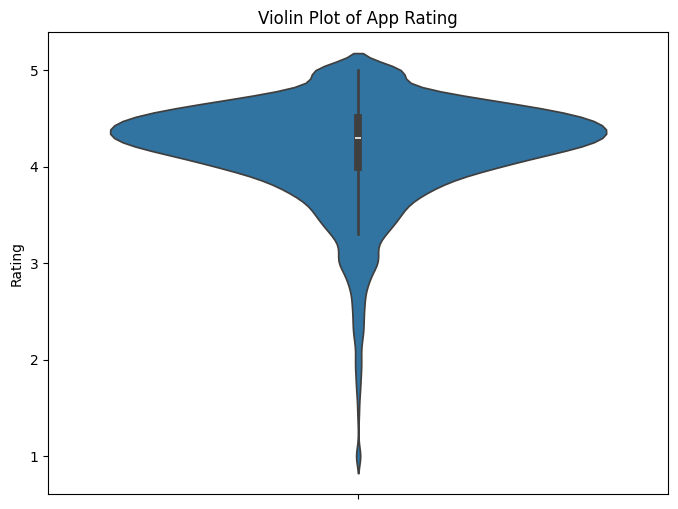

In [6]:

plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Rating'])  # Выбрано 'Rating' как числовая колонка
plt.title('Violin Plot of App Rating')
plt.ylabel('Rating')
plt.show()

In [7]:
# 4. Масштабирование данных (для 'Installs')
scaler = MinMaxScaler()  # Или StandardScaler, если данные распределены нормально
df['Installs_Scaled'] = scaler.fit_transform(df[['Installs']])

In [8]:
# Посмотрим на результат масштабирования:
print("Original Installs:", df['Installs'].head())
print("Scaled Installs:", df['Installs_Scaled'].head())


Original Installs: 0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64
Scaled Installs: 0    0.00001
1    0.00050
2    0.00500
3    0.05000
4    0.00010
Name: Installs_Scaled, dtype: float64


In [9]:
# 5. Преобразование категориальных признаков в количественные
# Выберем 'Category' для преобразования

# a) Label Encoding
label_encoder = LabelEncoder()
df['Category_LabelEncoded'] = label_encoder.fit_transform(df['Category'])


In [10]:
# b) One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #sparse=False для numpy array, handle_unknown='ignore' чтобы избежать ошибок

# Используем train_test_split для создания обучающего и тестового наборов
X_train, X_test, y_train, y_test = train_test_split(df[['Category']], df['Rating'], test_size=0.2, random_state=42)

In [11]:
# Применяем one-hot encoding только к обучающему набору, чтобы избежать утечки данных
onehot_encoder.fit(X_train[['Category']])

# Преобразуем обучающий и тестовый наборы
X_train_encoded = onehot_encoder.transform(X_train[['Category']])
X_test_encoded = onehot_encoder.transform(X_test[['Category']])

# Создаем DataFrame из закодированных данных
df_onehot_train = pd.DataFrame(X_train_encoded, columns=onehot_encoder.get_feature_names_out(['Category']))
df_onehot_test = pd.DataFrame(X_test_encoded, columns=onehot_encoder.get_feature_names_out(['Category']))

# Сбрасываем индексы в X_train и X_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)




In [12]:
# Объединяем закодированные данные с исходными наборами
X_train = pd.concat([X_train, df_onehot_train.set_index(X_train.index)], axis=1)
X_test = pd.concat([X_test, df_onehot_test.set_index(X_test.index)], axis=1)

In [13]:
# Выводим первые строки обработанных данных
print("Label Encoded Categories:", df[['Category', 'Category_LabelEncoded']].head())
print("One-Hot Encoded Categories Train:", X_train.head())
print("One-Hot Encoded Categories Test:", X_test.head())


Label Encoded Categories:          Category  Category_LabelEncoded
0  ART_AND_DESIGN                      0
1  ART_AND_DESIGN                      0
2  ART_AND_DESIGN                      0
3  ART_AND_DESIGN                      0
4  ART_AND_DESIGN                      0
One-Hot Encoded Categories Train:       Category  Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  \
0    LIFESTYLE                      0.0                         0.0   
1  PHOTOGRAPHY                      0.0                         0.0   
2     SHOPPING                      0.0                         0.0   
3       FAMILY                      0.0                         0.0   
4       DATING                      0.0                         0.0   

   Category_BEAUTY  Category_BOOKS_AND_REFERENCE  Category_BUSINESS  \
0              0.0                           0.0                0.0   
1              0.0                           0.0                0.0   
2              0.0                           0.0      

# 6. Обоснование выбора методов:


In [14]:
print("\nОбоснование выбора методов:")
print("1. Violin Plot:  Используется для визуализации распределения числовых данных. Показывает медиану, квартили и плотность распределения, что полезно для понимания формы распределения 'Rating'.")
print("2. MinMaxScaler:  Использован для масштабирования 'Installs' в диапазон [0, 1]. Подходит, когда важно сохранить отношения между значениями, и нет выбросов, сильно влияющих на результат. StandardScaler был бы лучше, если бы были выбросы и данные были бы распределены нормально.")
print("3. Label Encoding:  Преобразует 'Category' в числовые метки. Просто в реализации, но вносит искусственный порядок между категориями, что может быть нежелательно для алгоритмов, чувствительных к порядку (например, линейные модели).")
print("4. One-Hot Encoding:  Создает отдельные бинарные столбцы для каждой категории в 'Category'.  Не вносит искусственный порядок, подходит для большинства алгоритмов машинного обучения.  Однако, увеличивает размерность данных, особенно если категорий много.")


Обоснование выбора методов:
1. Violin Plot:  Используется для визуализации распределения числовых данных. Показывает медиану, квартили и плотность распределения, что полезно для понимания формы распределения 'Rating'.
2. MinMaxScaler:  Использован для масштабирования 'Installs' в диапазон [0, 1]. Подходит, когда важно сохранить отношения между значениями, и нет выбросов, сильно влияющих на результат. StandardScaler был бы лучше, если бы были выбросы и данные были бы распределены нормально.
3. Label Encoding:  Преобразует 'Category' в числовые метки. Просто в реализации, но вносит искусственный порядок между категориями, что может быть нежелательно для алгоритмов, чувствительных к порядку (например, линейные модели).
4. One-Hot Encoding:  Создает отдельные бинарные столбцы для каждой категории в 'Category'.  Не вносит искусственный порядок, подходит для большинства алгоритмов машинного обучения.  Однако, увеличивает размерность данных, особенно если категорий много.
